In [ ]:
# install hal hal yang diperlukan
pip install opendatasets
pip install pandas
pip install folium

In [2]:
# import folium
import folium

In [3]:
#import library yang digunakan

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import opendatasets as od

Pendahuluan Latar Belakang:
Melakukan eksplorasi terhadap data kriminalitas di London pada tahun 2008 - 2016. Data divisualisasikan berkaitan dengan tingkat kriminalitas di London.

Rumusan masalah pertanyaan:

Apa yang dapat diperoleh dari data kriminalitas? 
Dimana wilayah yang tidak aman?

Tujuan dari analisis ini adalah untuk menentukan temuan dalam data kriminalitas di London.

In [4]:
# Load data 
fn = "D:/Users/bsi80191/Downloads/sesi17/sesi 26/london_crime_by_lsoa.csv"
df = pd.read_csv(fn)

#menampilkan dataframe
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [5]:
# mendapatkan bentuk dari dataset
df.shape

(13490604, 7)

In [6]:
# melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [7]:
# mendapatkan info dari dtype data yang digunakan

df.dtypes

lsoa_code         object
borough           object
major_category    object
minor_category    object
value              int64
year               int64
month              int64
dtype: object

In [8]:
# menghitung missing value pada data
df.isna().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [9]:
# memperoleh descriptive statistik data 
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [10]:
# cek kolom maszeh
df.columns.values 

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [11]:
# cek duplikasi data
df[df.duplicated()==True]

,lsoa_code,borough,major_category,minor_category,value,year,month


In [12]:
# mengelompokkan data numeric
datas = df.copy()
num = datas.select_dtypes('int64')
num

,value,year,month
0,0,2016,11
1,0,2016,11
2,0,2015,5
3,0,2016,3
4,0,2008,6
...,...,...,...
13490599,0,2015,2
13490600,1,2015,6
13490601,0,2011,2
13490602,0,2011,5


In [13]:
# mengelompokkan data non numeric
obj = datas.select_dtypes('object')
obj

,lsoa_code,borough,major_category,minor_category
0,E01001116,Croydon,Burglary,Burglary in Other Buildings
1,E01001646,Greenwich,Violence Against the Person,Other violence
2,E01000677,Bromley,Violence Against the Person,Other violence
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings
4,E01004563,Wandsworth,Robbery,Personal Property
...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling
13490600,E01002504,Hillingdon,Robbery,Personal Property
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling
13490602,E01001134,Croydon,Robbery,Business Property


In [14]:
# mendriscribe data

datas.describe().T

,count,mean,std,min,25%,50%,75%,max
value,13490604.0,0.477944,1.771513,0.0,0.00,0.0,1.00,309.0
year,13490604.0,2012.000000,2.581989,2008.0,2010.00,2012.0,2014.00,2016.0
month,13490604.0,6.500000,3.452053,1.0,3.75,6.5,9.25,12.0


Bagaimana distribusi dari kategori besar tindak kriminal yang terjadi di London?

Distribusi ditampilkan dalam bentuk grafik batang menjelaskan terkait dengan distribusi tindak kriminal di London. Tindakan kriminal di London berdasarkan major category yang paling dominan kasusnya yaitu Theft and Handling disusul oleh Violence kemudian Criminal Damage. 
Distirbusi data menunjukan bahwa tindakan kriminal berupa Fraud dan Sexual Offences menjadi tindakan yang terendah pada distribusi major kriminal di London dalam kurun periode tahun 2008 - 2016. Data diperlihatkan pada gambar di bawah ini.

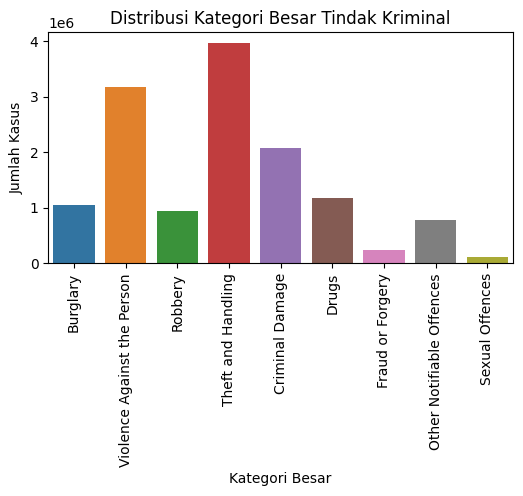

In [45]:
plt.figure(figsize=(6, 3))
sns.countplot(x='major_category', data=datas)
plt.xticks(rotation=90)
plt.title('Distribusi Kategori Besar Tindak Kriminal')
plt.xlabel('Kategori Besar')
plt.ylabel('Jumlah Kasus')
plt.show()

Melakukan import Wordcloud 

In [16]:
from wordcloud import WordCloud, STOPWORDS

Menginisiasi stopwords

In [17]:
stopwords = set(STOPWORDS)

Membuka file dan membacanya dalam variabel dtx

In [21]:
dtx = open('D:/Users/bsi80191/Downloads/sesi17/sesi 26/crime.txt', 'r').read()

In [22]:
# inisiasi awal wordcloud
wc = WordCloud(
    background_color='white',
    max_words=300,
    stopwords=stopwords
)

# memproses wordcloud
wc.generate(dtx)

Visualisasi wordcloud dilakukan dengan penampilan kata yang sering muncul pada data kriminal London

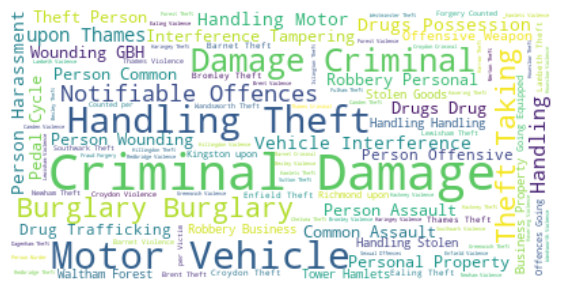

In [26]:
fig = plt.figure()
fig.set_figwidth(7) 
fig.set_figheight(9) 

# menampilkan wordcloud
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Menginisiasi agar FutureWarning tidak muncul pada proses visualisasi yang dilakukan. Hal ini agar dapat mempermudah dalam pembacaan hasil pada laman file jupyter notebook yang digunakan.

In [28]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Menghasilkan boxplot terhadap jumlah kasus kriminal yang ada 

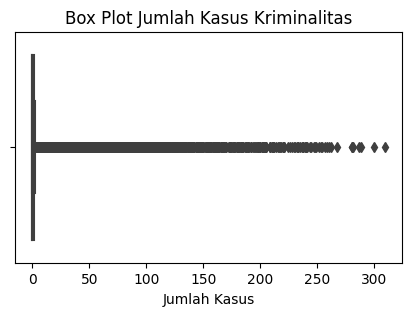

In [37]:
kriminals = 'value'  

plt.figure(figsize=(5, 3))
sns.boxplot(x=datas[kriminals])
plt.title('Box Plot Jumlah Kasus Kriminalitas')
plt.xlabel('Jumlah Kasus')
plt.show()

Bagaimana trend kriminalitas yang terjadi di Londo pada tahun 2008 - 2016?

Hasil menunjukkan bahwa trend kriminalitas sempat terjadi penurunan pada periode tahun 2012 hingga 2014, tetapi angka tersebut justru naik kembali pada tahun setelahnya yaitu 2015 hingga 2016 dengan kenaikan yang cukup signifikan

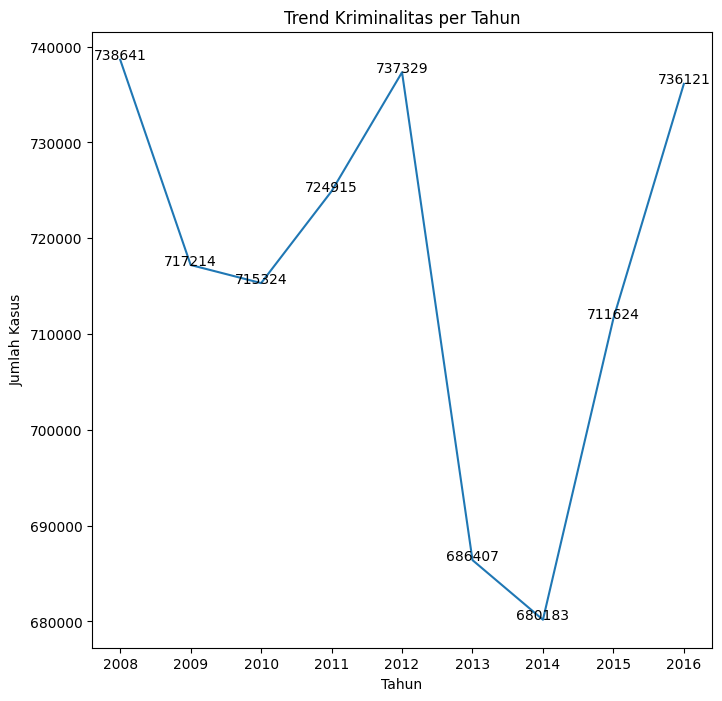

In [57]:
total_per_tahun = datas.groupby('year')['value'].sum().reset_index()

# Membuat plot
plt.figure(figsize=(8, 8))
sns.lineplot(x='year', y='value', data=total_per_tahun)
plt.title('Trend Kriminalitas per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kasus')

# Labelling
for i, row in total_per_tahun.iterrows():
    plt.annotate(f'{row["value"]}', (row['year'], row['value']), ha='center')

plt.show()

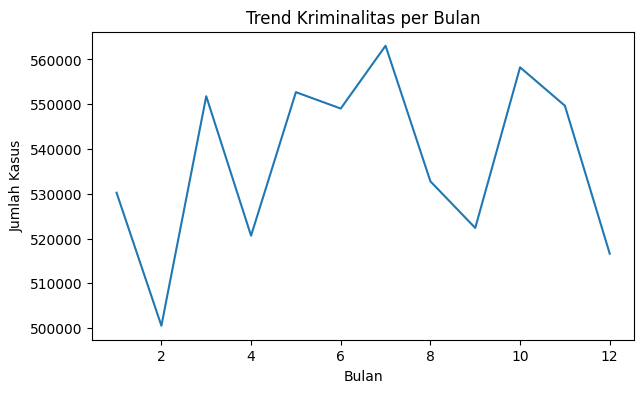

In [30]:
plt.figure(figsize=(7, 4))
sns.lineplot(x='month', y='value', data=datas.groupby('month')['value'].sum().reset_index())
plt.title('Trend Kriminalitas per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kasus')
plt.show()

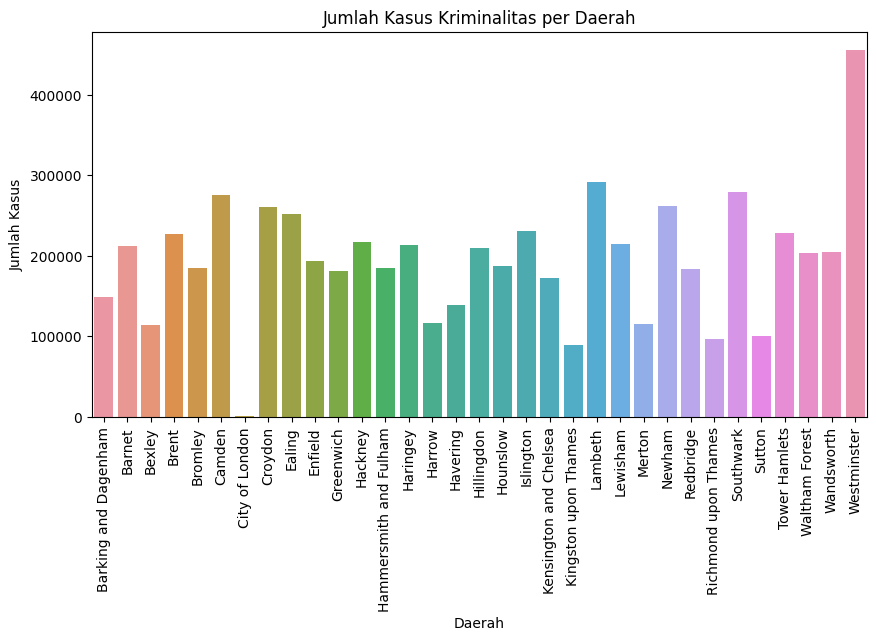

In [31]:
plt.figure(figsize=(10, 5))
sns.barplot(x='borough', y='value', data=datas.groupby('borough')['value'].sum().reset_index())
plt.xticks(rotation=90)
plt.title('Jumlah Kasus Kriminalitas per Daerah')
plt.xlabel('Daerah')
plt.ylabel('Jumlah Kasus')
plt.show()

In [ ]:
jumlah_kasus_per_daerah = datas.groupby('borough')['value'].sum().reset_index()

# Menampilkan tabel jumlah kasus per daerah
jumlah_kasus_per_daerah

,borough,value
0,Barking and Dagenham,149447
1,Barnet,212191
2,Bexley,114136
3,Brent,227551
4,Bromley,184349
5,Camden,275147
6,City of London,780
7,Croydon,260294
8,Ealing,251562
9,Enfield,193880


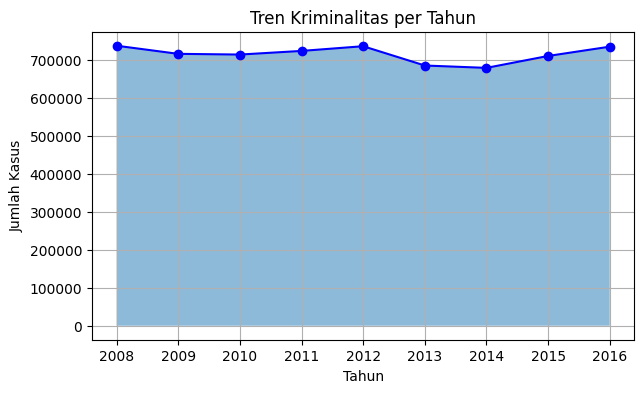

In [ ]:
# perhitungan jumlah kasus kriminal per tahun
jumlah_kasus_per_tahun = datas.groupby('year')['value'].sum()

# area plot 
plt.figure(figsize=(7, 4))
plt.fill_between(jumlah_kasus_per_tahun.index, jumlah_kasus_per_tahun.values, alpha=0.5)
plt.plot(jumlah_kasus_per_tahun.index, jumlah_kasus_per_tahun.values, marker='o', linestyle='-', color='b')
plt.title('Tren Kriminalitas per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kasus')
plt.grid(True)
plt.show()

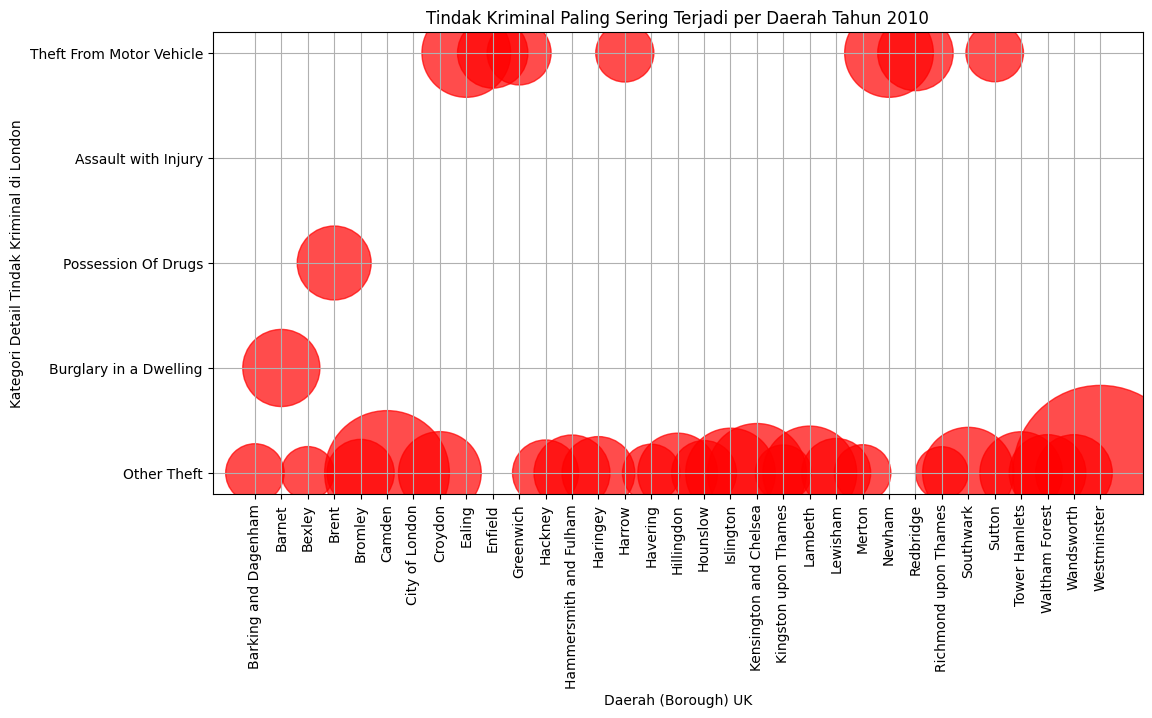

In [ ]:
# Pemfilteran data
data_2010 = datas[datas['year'] == 2010]

# Mengelompokkan data kriminal berdasarkan daerah dan tahun, menghitung jumlah tindak kriminal
grouped_data = data_2010.groupby(['year', 'borough', 'minor_category'])['value'].sum().reset_index()

# Identifikasi data tindak kriminal 
most_frequent_crime_per_borough = grouped_data.groupby(['borough'])['value'].idxmax()
most_frequent_crimes = grouped_data.loc[most_frequent_crime_per_borough]

# pembuata sctr plt
plt.figure(figsize=(12, 6))
plt.scatter(most_frequent_crimes['borough'], most_frequent_crimes['minor_category'], s=most_frequent_crimes['value'], alpha=0.7, c='red')
plt.title('Tindak Kriminal Paling Sering Terjadi per Daerah Tahun 2010')
plt.xlabel('Daerah (Borough) UK')
plt.ylabel('Kategori Detail Tindak Kriminal di London')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

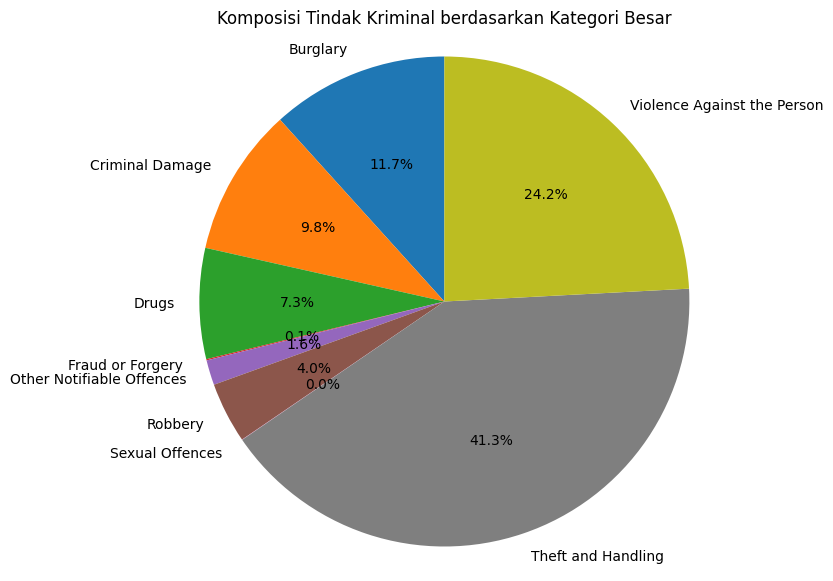

In [47]:
# Mengelompokkan data berdasarkan kategori besar tindak kriminal
total_kasus_per_kategori = datas.groupby('major_category')['value'].sum()

# Membuat pie chart
plt.figure(figsize=(8, 7))
plt.pie(total_kasus_per_kategori, labels=total_kasus_per_kategori.index, autopct='%1.1f%%', startangle=90)
plt.title('Komposisi Tindak Kriminal berdasarkan Kategori Besar')
plt.axis('equal')  
plt.xticks(rotation=90)
plt.show()

======================================================================================

Mapping Kriminal di London

In [ ]:
# Mencoba install geopandas
pip install geopandas

In [32]:
# Load lib geopandas
import geopandas as gpd

In [34]:
# Cek data geojson yang akan digunakan pada visualisasi
br_geo = gpd.read_file("https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson")
br_geo.head(10)

,name,color,geometry
0,Barking and Dagenham,blue,"POLYGON ((0.18859 51.55387, 0.18831 51.55402, ..."
1,Barnet,blue,"POLYGON ((-0.28515 51.63711, -0.28516 51.63710..."
2,Bexley,blue,"POLYGON ((0.13418 51.51493, 0.13367 51.51502, ..."
3,Brent,blue,"POLYGON ((-0.26549 51.59886, -0.26570 51.59904..."
4,Bromley,blue,"POLYGON ((-0.00337 51.34686, -0.00302 51.34593..."
5,Camden,blue,"POLYGON ((-0.14237 51.56930, -0.14237 51.56931..."
6,City of London,blue,"POLYGON ((-0.08528 51.52015, -0.08571 51.51946..."
7,Croydon,blue,"POLYGON ((0.00000 51.32889, 0.00005 51.32891, ..."
8,Ealing,blue,"POLYGON ((-0.37893 51.55427, -0.37905 51.55422..."
9,Enfield,blue,"POLYGON ((-0.01214 51.68092, -0.01397 51.68099..."


In [70]:
# Menyajikan peta
m = folium.Map(location=[51.50328814383201, -0.1265583725711623], zoom_start=10, tiles="cartodb positron")  

cp = folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/sic00der/hck/main/london_boroughs.json',
    data=datas,
    columns=['borough', 'value'], 
    fill_color='RdPu', 
    key_on='feature.properties.name', 
    fill_opacity=0.9,
    line_opacity=0.7,
    legend_name='Rating Kasus Kriminalitas'
).add_to(m)


# Menambahkan Tooltip pada json
cp.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'],labels=False)
)
m



Kesimpulan :




Westminster menduduki peringkat teratas dengan tingkat kejahatan terbanyak.


Maret, Juli dan Oktober adalah 3 bulan teratas dengan tingkat kriminalitas yang tinggi dari tahun 2008-2016.


Tahun 2008 adalah tahun dengan tingkat kejahatan tertinggi.